In [1]:
print("Hello")

Hello


Loading data...
Data loaded successfully.
Creating bar chart of top 10 species...
Bar chart saved to 'results/top_10_tree_species.png'
Creating line chart of yearly plantings...
Line chart saved to 'results/yearly_tree_plantings.png'
Creating box plot of planting years by species...
Box plot saved to 'results/species_year_boxplot.png'
Creating bar chart of trees per district...


/tmp/ipykernel_27216/2940909869.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='baumart', y='pflanzjahr', data=top_5_df, palette='pastel')


District bar chart saved to 'results/trees_per_district_barchart.png'
Creating stripplot of plantings by species...
Stripplot saved to 'results/species_year_stripplot.png'

All new plots have been created and saved! ✅


/tmp/ipykernel_27216/2940909869.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='pflanzjahr', y='baumart_short', data=top_7_df, jitter=0.25, palette='viridis', alpha=0.7)


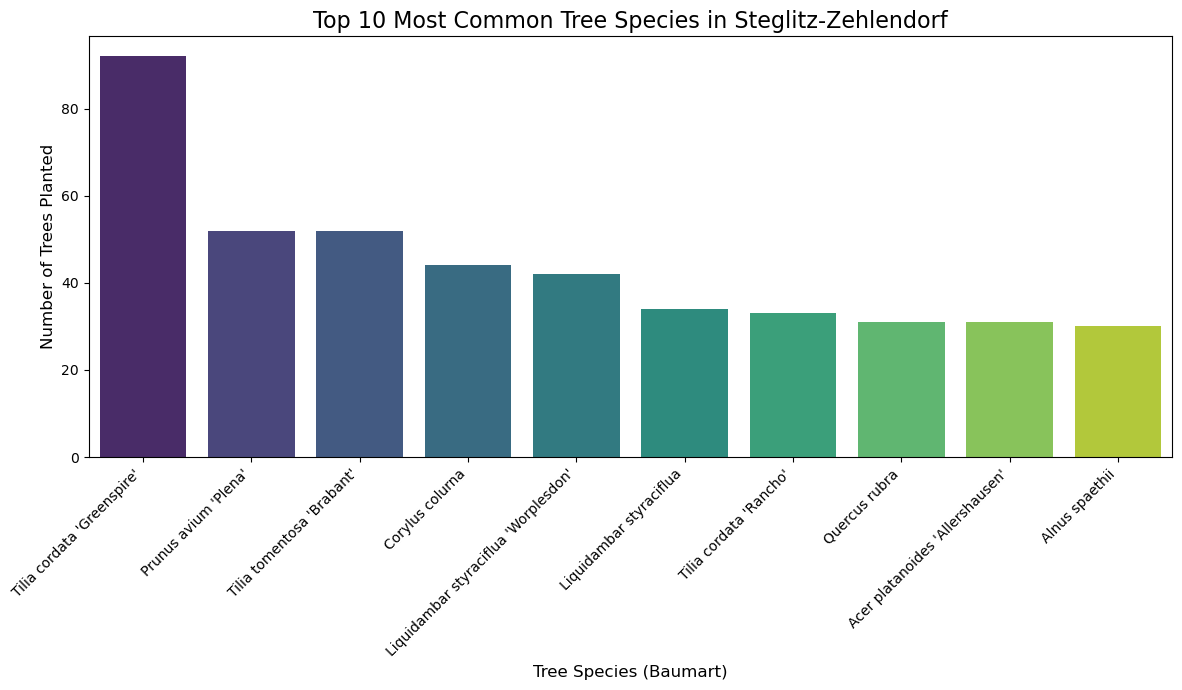

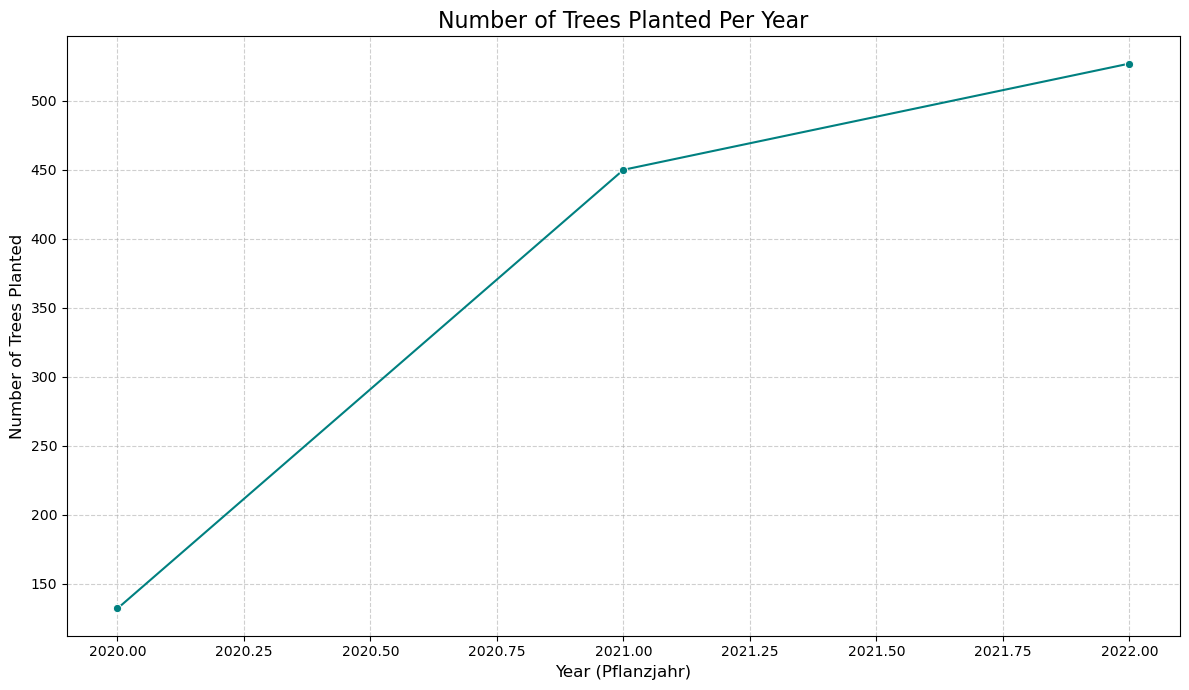

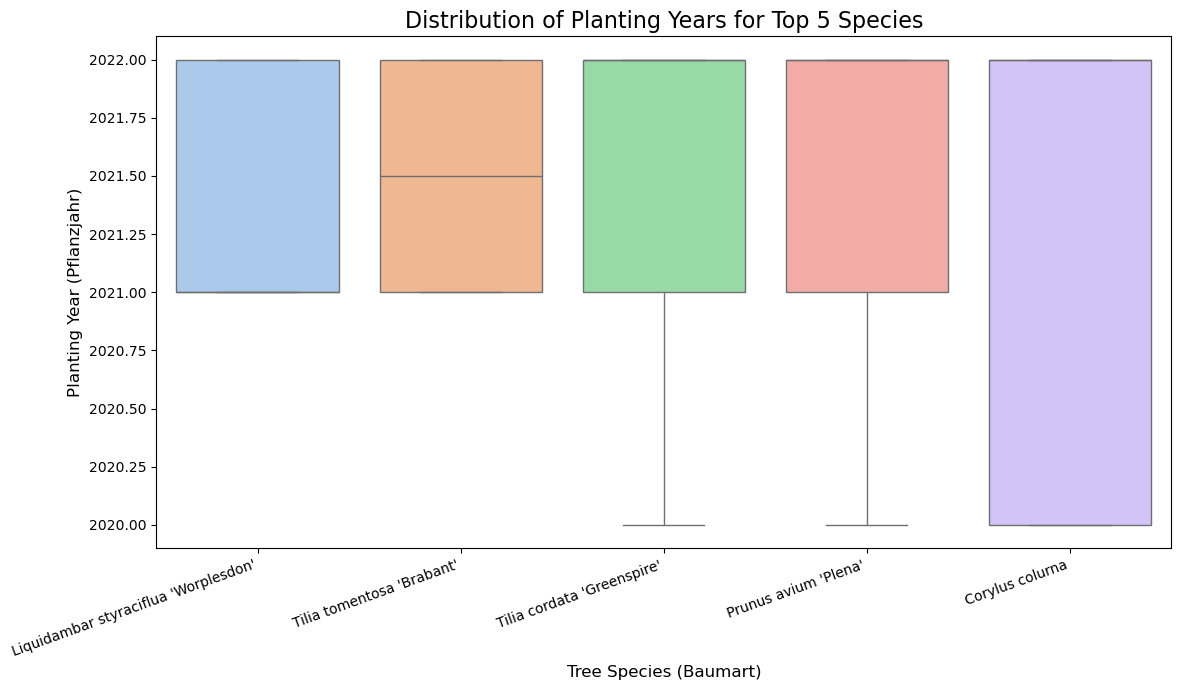

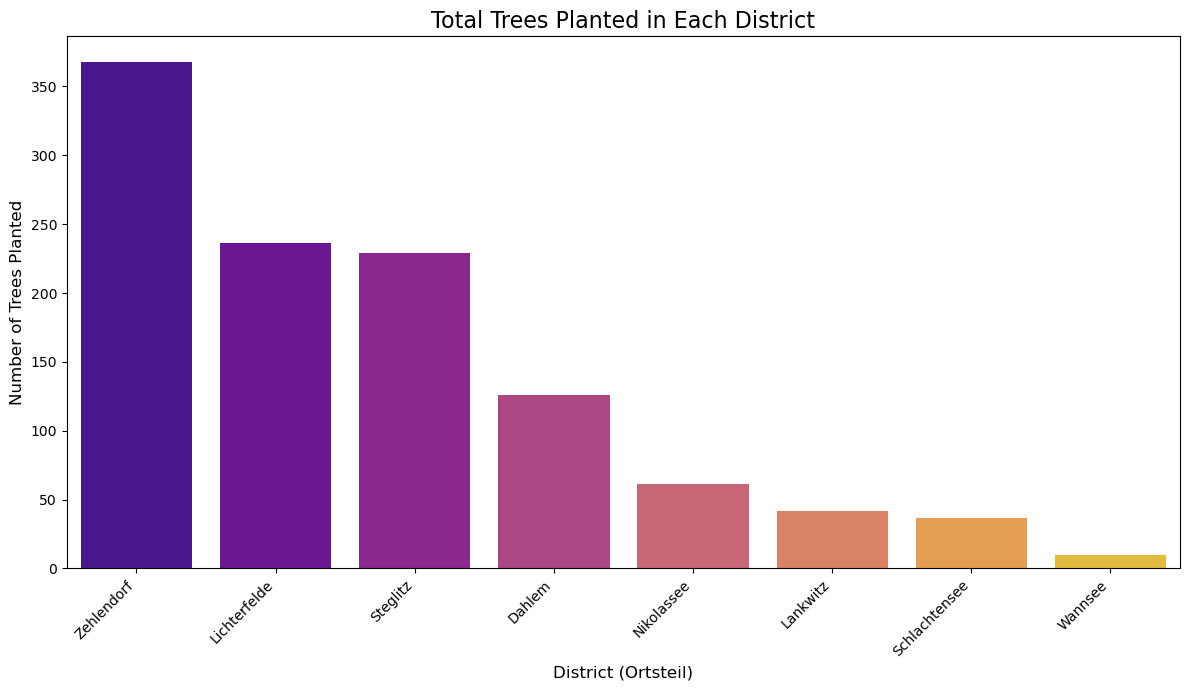

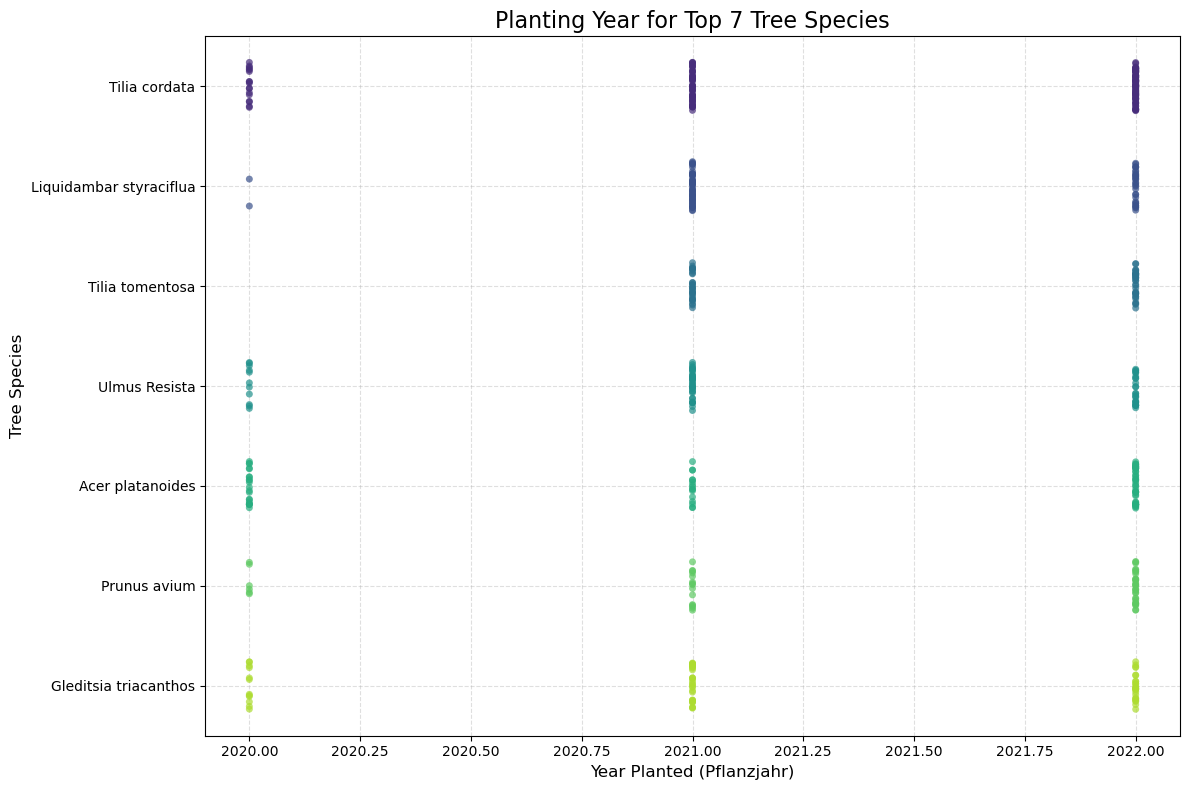

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to shorten long scientific names
def clean_species_name(name):
    """Takes a long species name and shortens it."""
    # Splits the name by spaces and takes the first two words
    return ' '.join(name.split()[:2])
# --- Setup ---
# Define the file path (assuming the CSV is in the same folder as the script)
file_path = '2025_trees_steglitz.csv'
save_folder = 'results'

# --- Load and Prepare Data ---
print("Loading data...")
try:
    # Use sep=';' because the file is semicolon-separated.
    trees_df = pd.read_csv(file_path, sep=';')
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found in this directory.")
    print("Please make sure your data file and script are in the same folder.")
    exit() # Exit the script if the file isn't found
#
trees_df['baumart_short'] = trees_df['baumart'].apply(clean_species_name)
#
# --- Plot 1: Top 10 Most Common Tree Species ---
print("Creating bar chart of top 10 species...")

# Get the top 10 species using value_counts()
top_10_species = trees_df['baumart'].value_counts().nlargest(10)

# Set the figure size for the plot
plt.figure(figsize=(12, 7))

# Create the bar plot using the updated Seaborn syntax to avoid warnings
sns.barplot(x=top_10_species.index, y=top_10_species.values, hue=top_10_species.index, palette='viridis', legend=False)

# Add titles and labels for clarity
plt.title('Top 10 Most Common Tree Species in Steglitz-Zehlendorf', fontsize=16)
plt.xlabel('Tree Species (Baumart)', fontsize=12)
plt.ylabel('Number of Trees Planted', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels to prevent them from overlapping
plt.tight_layout() # Adjust plot to ensure everything fits

# Save the plot to the results folder
plot1_path = f'{save_folder}/top_10_tree_species.png'
plt.savefig(plot1_path)
print(f"Bar chart saved to '{plot1_path}'")

# --- Plot 2: Number of Trees Planted Per Year ---
print("Creating line chart of yearly plantings...")

# Count trees per year and sort by year for a proper timeline
yearly_plantings = trees_df.dropna(subset=['pflanzjahr'])['pflanzjahr'].value_counts().sort_index()

# Set the figure size
plt.figure(figsize=(12, 7))

# Create the line plot
sns.lineplot(x=yearly_plantings.index, y=yearly_plantings.values, marker='o', color='teal')

# Add titles and labels
plt.title('Number of Trees Planted Per Year', fontsize=16)
plt.xlabel('Year (Pflanzjahr)', fontsize=12)
plt.ylabel('Number of Trees Planted', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6) # Add a grid for better readability
plt.tight_layout()

# Save the plot to the results folder
plot2_path = f'{save_folder}/yearly_tree_plantings.png'
plt.savefig(plot2_path)
print(f"Line chart saved to '{plot2_path}'")

# --- Plot 3: Box Plot of Planting Year by Top 5 Species ---
print("Creating box plot of planting years by species...")

# First, find the names of the top 5 most common species
top_5_species_names = trees_df['baumart'].value_counts().nlargest(5).index

# Filter the original DataFrame to only include rows with those top 5 species
top_5_df = trees_df[trees_df['baumart'].isin(top_5_species_names)]

# Create the box plot
plt.figure(figsize=(12, 7))
sns.boxplot(x='baumart', y='pflanzjahr', data=top_5_df, palette='pastel')

# Add titles and labels
plt.title('Distribution of Planting Years for Top 5 Species', fontsize=16)
plt.xlabel('Tree Species (Baumart)', fontsize=12)
plt.ylabel('Planting Year (Pflanzjahr)', fontsize=12)
plt.xticks(rotation=20, ha='right') # Rotate labels slightly
plt.tight_layout()

# Save the plot
plot3_path = f'{save_folder}/species_year_boxplot.png'
plt.savefig(plot3_path)
print(f"Box plot saved to '{plot3_path}'")
# --- Plot 4: Bar Chart of Trees per District ---
print("Creating bar chart of trees per district...")

# Count the number of trees in each district
district_counts = trees_df['ortsteil'].value_counts()

# Create the plot
plt.figure(figsize=(12, 7))
sns.barplot(x=district_counts.index, y=district_counts.values, hue=district_counts.index, palette='plasma', legend=False)

# Add titles and labels
plt.title('Total Trees Planted in Each District', fontsize=16)
plt.xlabel('District (Ortsteil)', fontsize=12)
plt.ylabel('Number of Trees Planted', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot
plot4_path = f'{save_folder}/trees_per_district_barchart.png'
plt.savefig(plot4_path)
print(f"District bar chart saved to '{plot4_path}'")
# --- Plot 5: Stripplot of Plantings by Species Over Time ---
print("Creating stripplot of plantings by species...")

# Get the names of the top 7 species using our new short names
top_7_species_short_names = trees_df['baumart_short'].value_counts().nlargest(7).index

# Filter the DataFrame to include only those top 7 species
top_7_df = trees_df[trees_df['baumart_short'].isin(top_7_species_short_names)]

# Create the stripplot
plt.figure(figsize=(12, 8))
# Jitter adds a little horizontal noise so the dots don't overlap as much
sns.stripplot(x='pflanzjahr', y='baumart_short', data=top_7_df, jitter=0.25, palette='viridis', alpha=0.7)

# Add titles and labels
plt.title('Planting Year for Top 7 Tree Species', fontsize=16)
plt.xlabel('Year Planted (Pflanzjahr)', fontsize=12)
plt.ylabel('Tree Species', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()

# Save the plot
plot5_path = f'{save_folder}/species_year_stripplot.png'
plt.savefig(plot5_path)
print(f"Stripplot saved to '{plot5_path}'")

# --- Final message ---
print("\nAll new plots have been created and saved! ✅")


